# LGM VIP AUGUST 2021 BATCH
## Name-Rahul Pahuja
## Task-2: Stock Market Prediction And Forecasting Using Stacked LSTM

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [145]:
df = pd.read_csv('/content/sample_data/NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [146]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [147]:
dff=df.reset_index()['Close']
dff

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

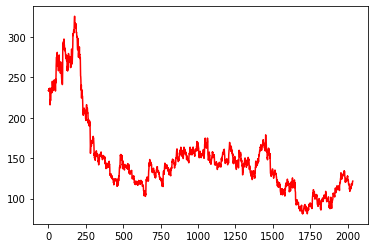

In [148]:
import matplotlib.pyplot as plt
plt.plot(dff,color='red')

In [149]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [150]:
training_size=int(len(dff)*0.65)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]
training_size,test_size

(1322, 713)

In [151]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [152]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [153]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [154]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=20,verbose=1)

Epoch 1/50
62/62 [==============================] - 15s 171ms/step - loss: 0.0079 - val_loss: 8.0592e-04
Epoch 2/50
62/62 [==============================] - 9s 154ms/step - loss: 0.0023 - val_loss: 7.8950e-04
Epoch 3/50
62/62 [==============================] - 9s 151ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/50
62/62 [==============================] - 9s 151ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 5/50
62/62 [==============================] - 9s 151ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 6/50
62/62 [==============================] - 9s 152ms/step - loss: 0.0011 - val_loss: 8.1326e-04
Epoch 7/50
62/62 [==============================] - 9s 151ms/step - loss: 9.7415e-04 - val_loss: 6.8024e-04
Epoch 8/50
62/62 [==============================] - 10s 154ms/step - loss: 9.4081e-04 - val_loss: 6.5476e-04
Epoch 9/50
62/62 [==============================] - 9s 153ms/step - loss: 9.4254e-04 - val_loss: 7.1691e-04
Epoch 10/50
62/62 [==============================] - 9s 152ms/

In [157]:
tr_predict=model.predict(X_train)
te_predict=model.predict(X_test)

In [158]:
tr_predict=scaler.inverse_transform(tr_predict)
te_predict=scaler.inverse_transform(te_predict)
math.sqrt(mean_squared_error(y_train,tr_predict))

167.56989764614912

In [159]:
math.sqrt(mean_squared_error(ytest,te_predict))

116.32637712494216

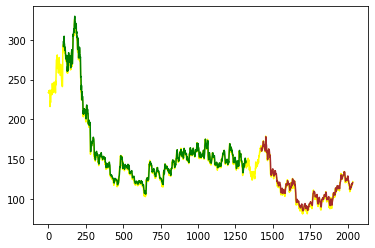

In [160]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dff)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(tr_predict)+look_back, :] = tr_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dff)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(tr_predict)+(look_back*2)+1:len(dff)-1, :] = te_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dff),color="yellow")
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='brown')
plt.show()

In [161]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [162]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [163]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=371
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

In [164]:
n=np.arange(1,101)
pred=np.arange(101,131)
dff.shape

(2035, 1)

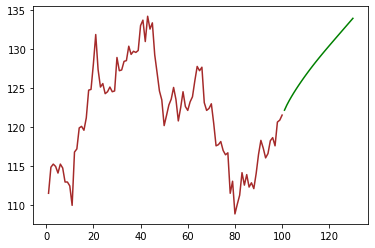

In [165]:
plt.plot(n,scaler.inverse_transform(dff[1935:]),color='brown')
plt.plot(pred,scaler.inverse_transform(lst_output),color='green')

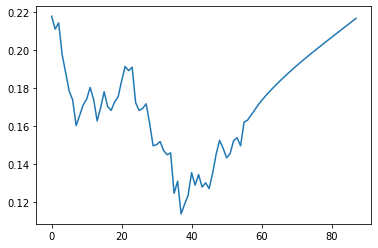

In [166]:
dff=dff.tolist()
dff.extend(lst_output)
plt.plot(dff[1977:])

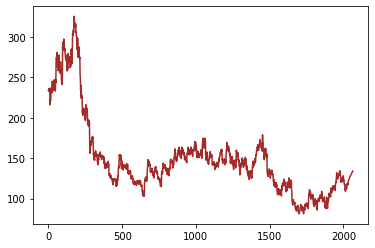

In [167]:
dff=scaler.inverse_transform(dff).tolist()
plt.plot(dff,color='brown')